<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS0613_Airline_Delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and reading the CSV

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:
airline = pd.read_csv('/content/Airline_on_time_west_coast.csv')

# Analysis of the data

In [99]:
airline

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST_CITY_NAME,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
0,1,1,2014-12-01,AA,AA,1,JFK,"New York, NY","Los Angeles, CA",1203.0,-27.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2014-12-01,AA,AA,2,LAX,"Los Angeles, CA","New York, NY",1649.0,-46.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2014-12-01,AA,AA,3,JFK,"New York, NY","Los Angeles, CA",1542.0,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2014-12-01,AA,AA,4,LAX,"Los Angeles, CA","New York, NY",2144.0,54.0,3.0,0.0,0.0,0.0,51.0,NaN
4,1,1,2014-12-01,AA,AA,5,DFW,"Dallas/Fort Worth, TX","Honolulu, HI",2033.0,173.0,168.0,0.0,5.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477178,31,3,2014-12-31,WN,WN,2180,SMF,"Sacramento, CA","San Diego, CA",1600.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
477179,31,3,2014-12-31,WN,WN,3128,SMF,"Sacramento, CA","San Diego, CA",2026.0,21.0,0.0,0.0,0.0,0.0,21.0,NaN
477180,31,3,2014-12-31,WN,WN,3317,SMF,"Sacramento, CA","San Diego, CA",1048.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
477181,31,3,2014-12-31,WN,WN,4996,SMF,"Sacramento, CA","San Diego, CA",1701.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477183 entries, 0 to 477182
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         477183 non-null  int64  
 1   DAY_OF_WEEK          477183 non-null  int64  
 2   FL_DATE              477183 non-null  object 
 3   UNIQUE_CARRIER       477183 non-null  object 
 4   CARRIER              477183 non-null  object 
 5   FL_NUM               477183 non-null  int64  
 6   ORIGIN               477183 non-null  object 
 7   ORIGIN_CITY_NAME     477183 non-null  object 
 8   DEST_CITY_NAME       477183 non-null  object 
 9   ARR_TIME             470175 non-null  float64
 10  ARR_DELAY            469400 non-null  float64
 11  CARRIER_DELAY        110163 non-null  float64
 12  WEATHER_DELAY        110163 non-null  float64
 13  NAS_DELAY            110163 non-null  float64
 14  SECURITY_DELAY       110163 non-null  float64
 15  LATE_AIRCRAFT_DEL

* The columns with null values are:
  * Arrival Time
  * Arrival Delay
  * Carrier Delay
  * Weather Delay
  * NAS Delay (Google Search: this is a form of "less severe" weather delay)
  * Security Delay
  * Late Aircraft Delay
* Arrival Time has some Null values.
* Arrival Delay appears to be the sum of the other delay reasons.
* There are some values of Arrival delay that are not NAN, but the sub reasons are NAN.
* The sub delay reasons are all NAN if one is NAN.

In [101]:
airline.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
count,477183.000000,477183.000000,477183.000000,470175.000000,469400.000000,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000,0.0
mean,15.896903,3.755490,2269.709954,1487.164705,7.429830,16.940534,1.286866,12.860852,0.064722,22.869021,NaN
std,8.948916,2.012361,1832.906810,510.566568,39.600015,44.437438,13.769430,25.623630,1.638324,39.829825,NaN
min,1.000000,1.000000,1.000000,1.000000,-84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,8.000000,2.000000,744.000000,1111.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,16.000000,4.000000,1722.000000,1517.000000,-2.000000,3.000000,0.000000,3.000000,0.000000,8.000000,NaN
75%,23.000000,5.000000,3482.000000,1915.000000,13.000000,17.000000,0.000000,17.000000,0.000000,30.000000,NaN
max,31.000000,7.000000,9320.000000,2400.000000,1940.000000,1937.000000,966.000000,993.000000,180.000000,1290.000000,NaN


## Looking at the histogram of the delay reasons. First the arrival times on it's own, and then the sub reasons.

They do appear to be very skewed by some large delay values on the right hand side. Therefore we should opt to use the median over the mean where necessary.

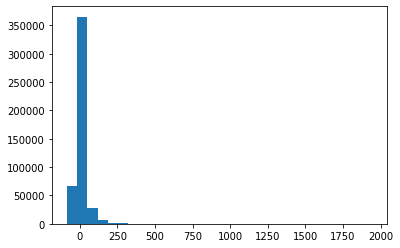

In [102]:
plt.hist(airline.ARR_DELAY, bins=30);

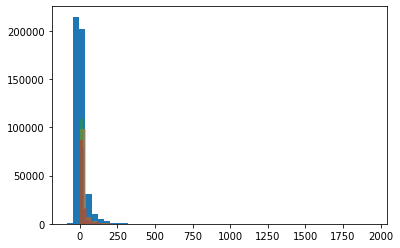

In [103]:
delay_bins = 50
delay_alpha = .5
plt.hist(airline.ARR_DELAY, bins = delay_bins, alpha = 1);
plt.hist(airline.CARRIER_DELAY, bins = delay_bins, alpha = delay_alpha);
plt.hist(airline.WEATHER_DELAY, bins = delay_bins, alpha = delay_alpha);
plt.hist(airline.NAS_DELAY, bins = delay_bins, alpha = delay_alpha);
plt.hist(airline.SECURITY_DELAY, bins = delay_bins, alpha = delay_alpha);
plt.hist(airline.LATE_AIRCRAFT_DELAY, bins = delay_bins, alpha = delay_alpha);

## Analysis to show all of the NAN values are the same.

The analysis below is to ensure that the 110163 NAN rows for the sub reasons are all of the same. They appear to be.

In [104]:
airline[airline['ARR_DELAY'].notnull() & airline['CARRIER_DELAY'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110163 entries, 3 to 477182
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         110163 non-null  int64  
 1   DAY_OF_WEEK          110163 non-null  int64  
 2   FL_DATE              110163 non-null  object 
 3   UNIQUE_CARRIER       110163 non-null  object 
 4   CARRIER              110163 non-null  object 
 5   FL_NUM               110163 non-null  int64  
 6   ORIGIN               110163 non-null  object 
 7   ORIGIN_CITY_NAME     110163 non-null  object 
 8   DEST_CITY_NAME       110163 non-null  object 
 9   ARR_TIME             110163 non-null  float64
 10  ARR_DELAY            110163 non-null  float64
 11  CARRIER_DELAY        110163 non-null  float64
 12  WEATHER_DELAY        110163 non-null  float64
 13  NAS_DELAY            110163 non-null  float64
 14  SECURITY_DELAY       110163 non-null  float64
 15  LATE_AIRCRAFT_DEL

In [105]:
airline[airline['ARR_DELAY'].notnull() & airline['CARRIER_DELAY'].notnull()].describe()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
count,110163.000000,110163.00000,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000,110163.000000,0.0
mean,16.932663,3.61606,2380.392537,1605.409693,54.021995,16.940534,1.286866,12.860852,0.064722,22.869021,NaN
std,9.108650,1.97540,1878.304917,568.812686,58.585190,44.437438,13.769430,25.623630,1.638324,39.829825,NaN
min,1.000000,1.00000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,9.000000,2.00000,749.000000,1313.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,18.000000,3.00000,1829.000000,1721.000000,35.000000,3.000000,0.000000,3.000000,0.000000,8.000000,NaN
75%,24.000000,5.00000,3661.000000,2037.000000,63.000000,17.000000,0.000000,17.000000,0.000000,30.000000,NaN
max,31.000000,7.00000,9320.000000,2400.000000,1940.000000,1937.000000,966.000000,993.000000,180.000000,1290.000000,NaN


In [106]:
airline[airline['ARR_DELAY'].notnull() & airline['CARRIER_DELAY'].notnull()]

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST_CITY_NAME,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 16
3,1,1,2014-12-01,AA,AA,4,LAX,"Los Angeles, CA","New York, NY",2144.0,54.0,3.0,0.0,0.0,0.0,51.0,NaN
4,1,1,2014-12-01,AA,AA,5,DFW,"Dallas/Fort Worth, TX","Honolulu, HI",2033.0,173.0,168.0,0.0,5.0,0.0,0.0,NaN
5,1,1,2014-12-01,AA,AA,6,OGG,"Kahului, HI","Dallas/Fort Worth, TX",541.0,31.0,1.0,0.0,0.0,0.0,30.0,NaN
6,1,1,2014-12-01,AA,AA,7,DFW,"Dallas/Fort Worth, TX","Kahului, HI",1742.0,67.0,29.0,0.0,9.0,0.0,29.0,NaN
16,1,1,2014-12-01,AA,AA,19,JFK,"New York, NY","Los Angeles, CA",1441.0,21.0,0.0,0.0,21.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477168,31,3,2014-12-31,WN,WN,477,SMF,"Sacramento, CA","Ontario, CA",1500.0,45.0,9.0,0.0,0.0,0.0,36.0,NaN
477173,31,3,2014-12-31,WN,WN,2088,SMF,"Sacramento, CA","Phoenix, AZ",1601.0,36.0,7.0,0.0,6.0,0.0,23.0,NaN
477175,31,3,2014-12-31,WN,WN,4839,SMF,"Sacramento, CA","Phoenix, AZ",1308.0,23.0,8.0,0.0,15.0,0.0,0.0,NaN
477179,31,3,2014-12-31,WN,WN,3128,SMF,"Sacramento, CA","San Diego, CA",2026.0,21.0,0.0,0.0,0.0,0.0,21.0,NaN


Nothing conclusive about the above.

If we look at the NAN values for the sub reasons, if one is NAN, they are all NAN.

In [107]:
airline_nan = airline[['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [108]:
airline_nan['ALL_NAN'] = pd.notnull(airline_nan).any(axis=1);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
airline_nan[airline_nan['ALL_NAN'] == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367020 entries, 0 to 477181
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CARRIER_DELAY        0 non-null       float64
 1   WEATHER_DELAY        0 non-null       float64
 2   NAS_DELAY            0 non-null       float64
 3   SECURITY_DELAY       0 non-null       float64
 4   LATE_AIRCRAFT_DELAY  0 non-null       float64
 5   ALL_NAN              367020 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 17.2 MB


## Deep dive into Arrival Time

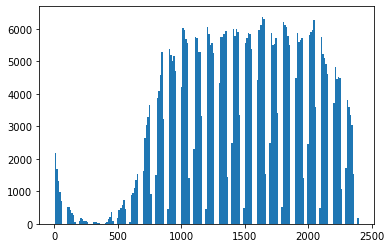

In [110]:
plt.hist(airline.ARR_TIME, bins = 200);

In [111]:
# median arrival time by flight number
arr_time_dist = airline.groupby('FL_NUM')['ARR_TIME'].count()

In [112]:
arr_time_dist

FL_NUM
1       174
2       196
3       221
4       172
5       200
       ... 
7432     58
7433      2
7438     40
7439      2
9320      1
Name: ARR_TIME, Length: 6336, dtype: int64

## Deep dive into some of the column values

## It appears the Unique Carrier and Carrier columns are the same

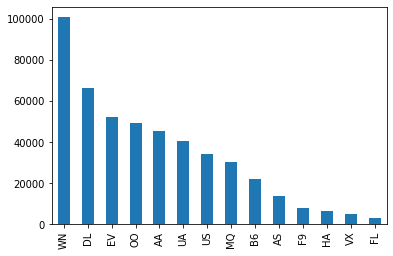

In [113]:
airline.UNIQUE_CARRIER.value_counts().plot(kind = 'bar');

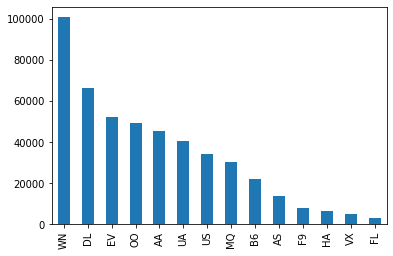

In [114]:
airline.CARRIER.value_counts().plot(kind = 'bar');

## Look at origin and destinations

The destination data is too dense to make good sense out of. Also, for the outlier origin data, they tend to be in very small airports, so hard to measure total impact.

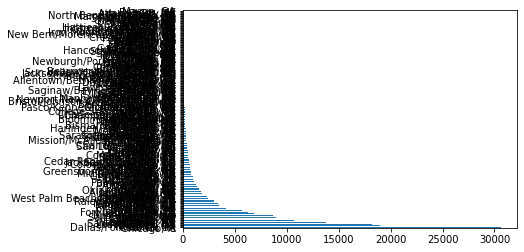

In [115]:
airline.ORIGIN_CITY_NAME.value_counts().plot(kind = 'barh');

This doesn't tell us very much. We should look at average delays

In [116]:
airline.groupby('ORIGIN_CITY_NAME')['ARR_DELAY'].agg({'mean','count'})
# orig_city_mean.sort_values('mean',ascending=False).plot(kind='barh');

,mean,count
ORIGIN_CITY_NAME,,
"Aberdeen, SD",11.737705,61
"Abilene, TX",22.004464,224
"Adak Island, AK",10.714286,7
"Aguadilla, PR",0.931298,131
"Akron, OH",-3.612416,596
...,...,...
"Wilmington, NC",0.830065,153
"Worcester, MA",-7.482759,58
"Wrangell, AK",11.133333,60


This also doesn't seem to tell us much.

# Hypotheses on the distribution of the Delay Values.
* Carrier Delay may be due to which carrier it is.
* Weather Delay may be either related to either the destination or arrival city. NAS Delay is also a form of weather delay, so may be similar.
* Security Delay may be due to origin airport.
* Late aircraft may be due to origin airport.
* Certain delays may have more delays than others.

### See if Carrier has any impact on delays

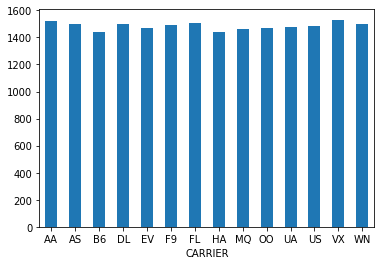

In [117]:
airline.groupby('CARRIER')['ARR_TIME'].mean().plot(kind = 'bar', rot=0);

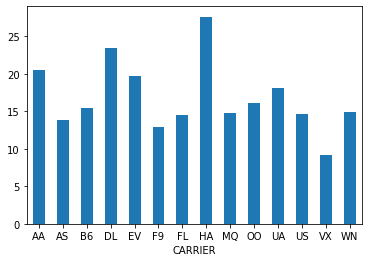

In [118]:
airline.groupby('CARRIER')['CARRIER_DELAY'].mean().plot(kind = 'bar', rot=0);

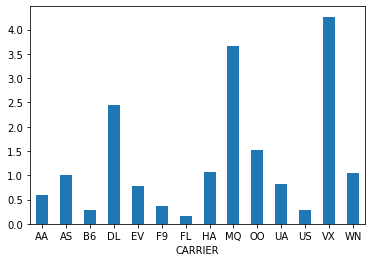

In [119]:
airline.groupby('CARRIER')['WEATHER_DELAY'].mean().plot(kind = 'bar', rot=0);

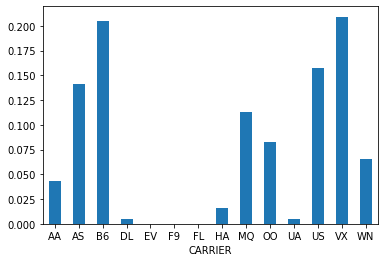

In [120]:
airline.groupby('CARRIER')['SECURITY_DELAY'].mean().plot(kind = 'bar', rot=0);

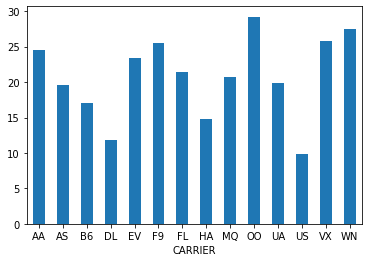

In [121]:
airline.groupby('CARRIER')['LATE_AIRCRAFT_DELAY'].mean().plot(kind = 'bar', rot=0);

### Let's see if date of month or week has any impact. No impact.


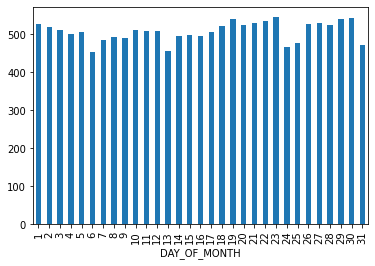

In [122]:
airline.groupby('DAY_OF_MONTH')['ARR_TIME'].std().plot(kind = 'bar')

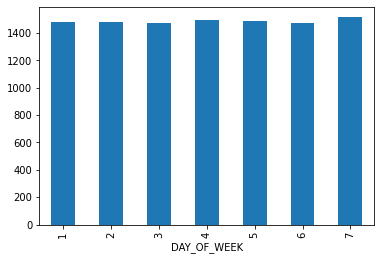

In [123]:
airline.groupby('DAY_OF_WEEK')['ARR_TIME'].mean().plot(kind = 'bar')

# We're going to fill in the NANs now. 3 approaches:
* For values where it ARR_TIME and sub reasons are NAN, we're going to go with the median value of the column. The histograms are really skewed by outlier values, so we do not want to use the mean
* For the values where ARR_TIME has value, but sub reasons are NAN, we're going to normalize it to the other NAN column distribution.
* For the missing values of Arrival Time, just use the median of their flight codes


### Filling in the missing arrival times based on flight number. 
Given that flights, as designated by flight numbers, tend to be scheduled for the same time, using the median flight number should be sufficient. There is some risk that there may only be one datapoint for a flight number, and that datapoint is already NaN. However, upon running the analysis, it appears that all of the flight numbers have sufficient data


In [124]:
airline.ARR_TIME.fillna(airline.groupby('FL_NUM')['ARR_TIME'].transform('mean'),inplace=True)
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477183 entries, 0 to 477182
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         477183 non-null  int64  
 1   DAY_OF_WEEK          477183 non-null  int64  
 2   FL_DATE              477183 non-null  object 
 3   UNIQUE_CARRIER       477183 non-null  object 
 4   CARRIER              477183 non-null  object 
 5   FL_NUM               477183 non-null  int64  
 6   ORIGIN               477183 non-null  object 
 7   ORIGIN_CITY_NAME     477183 non-null  object 
 8   DEST_CITY_NAME       477183 non-null  object 
 9   ARR_TIME             477182 non-null  float64
 10  ARR_DELAY            469400 non-null  float64
 11  CARRIER_DELAY        110163 non-null  float64
 12  WEATHER_DELAY        110163 non-null  float64
 13  NAS_DELAY            110163 non-null  float64
 14  SECURITY_DELAY       110163 non-null  float64
 15  LATE_AIRCRAFT_DEL

## Fixing the NAN values for NANs for ARR and sub reasons.

In this case, we think we should use the median values based on carrier and origin.

In [125]:
airline.ARR_DELAY.fillna(airline.groupby(['CARRIER','ORIGIN'])['ARR_DELAY'].transform('median'),inplace=True)
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477183 entries, 0 to 477182
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         477183 non-null  int64  
 1   DAY_OF_WEEK          477183 non-null  int64  
 2   FL_DATE              477183 non-null  object 
 3   UNIQUE_CARRIER       477183 non-null  object 
 4   CARRIER              477183 non-null  object 
 5   FL_NUM               477183 non-null  int64  
 6   ORIGIN               477183 non-null  object 
 7   ORIGIN_CITY_NAME     477183 non-null  object 
 8   DEST_CITY_NAME       477183 non-null  object 
 9   ARR_TIME             477182 non-null  float64
 10  ARR_DELAY            477183 non-null  float64
 11  CARRIER_DELAY        110163 non-null  float64
 12  WEATHER_DELAY        110163 non-null  float64
 13  NAS_DELAY            110163 non-null  float64
 14  SECURITY_DELAY       110163 non-null  float64
 15  LATE_AIRCRAFT_DEL

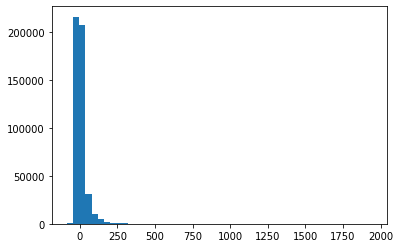

In [126]:
plt.hist(airline.ARR_DELAY, bins = delay_bins);

## Fixing the rows where there is a ARR_TIME value, but NAN values for others.
* Look at the distribution of sub delay reasons.
* Apply the average to NAN values.

In [127]:
# calculate the weights for the different reasons.
carrier_delay_perc = airline[airline['CARRIER_DELAY'].notnull()].CARRIER_DELAY.sum() / airline[airline['CARRIER_DELAY'].notnull()].ARR_DELAY.sum()
weather_delay_perc = airline[airline['CARRIER_DELAY'].notnull()].WEATHER_DELAY.sum() / airline[airline['CARRIER_DELAY'].notnull()].ARR_DELAY.sum()
nas_delay_perc = airline[airline['CARRIER_DELAY'].notnull()].NAS_DELAY.sum() / airline[airline['CARRIER_DELAY'].notnull()].ARR_DELAY.sum()
security_delay_perc = airline[airline['CARRIER_DELAY'].notnull()].SECURITY_DELAY.sum() / airline[airline['CARRIER_DELAY'].notnull()].ARR_DELAY.sum()
aircraft_delay_perc = airline[airline['CARRIER_DELAY'].notnull()].LATE_AIRCRAFT_DELAY.sum() / airline[airline['CARRIER_DELAY'].notnull()].ARR_DELAY.sum()

carrier_delay_perc + weather_delay_perc + nas_delay_perc + security_delay_perc + aircraft_delay_perc

1.0

In [128]:
airline['CARRIER_DELAY'].fillna(airline['ARR_DELAY'] * carrier_delay_perc, inplace=True)
airline['WEATHER_DELAY'].fillna(airline['ARR_DELAY'] * weather_delay_perc, inplace=True)
airline['NAS_DELAY'].fillna(airline['ARR_DELAY'] * nas_delay_perc, inplace=True)
airline['SECURITY_DELAY'].fillna(airline['ARR_DELAY'] * security_delay_perc, inplace=True)
airline['LATE_AIRCRAFT_DELAY'].fillna(airline['ARR_DELAY'] * aircraft_delay_perc, inplace=True)
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477183 entries, 0 to 477182
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         477183 non-null  int64  
 1   DAY_OF_WEEK          477183 non-null  int64  
 2   FL_DATE              477183 non-null  object 
 3   UNIQUE_CARRIER       477183 non-null  object 
 4   CARRIER              477183 non-null  object 
 5   FL_NUM               477183 non-null  int64  
 6   ORIGIN               477183 non-null  object 
 7   ORIGIN_CITY_NAME     477183 non-null  object 
 8   DEST_CITY_NAME       477183 non-null  object 
 9   ARR_TIME             477182 non-null  float64
 10  ARR_DELAY            477183 non-null  float64
 11  CARRIER_DELAY        477183 non-null  float64
 12  WEATHER_DELAY        477183 non-null  float64
 13  NAS_DELAY            477183 non-null  float64
 14  SECURITY_DELAY       477183 non-null  float64
 15  LATE_AIRCRAFT_DEL